In [1]:
!pip install nltk
!pip3 install flair
!pip install textblob

!pip install stanza
!pip install spacy

In [2]:
import numpy as np
import pandas as pd

In [3]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
SIA = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [4]:
# Stanza NLP CNN 

import stanza
stanza.download('en', package='ewt', processors='tokenize,sentiment', verbose=True)
stanza.download('en', package='default', processors='tokenize,sentiment', verbose=True)
stNLP = stanza.Pipeline(processors='tokenize,sentiment', lang='en', use_gpu=True)

def stanza_funct(text):
    data = stNLP(text)
    for sentence in data.sentences:
        return sentence.sentiment

2020-08-28 23:09:47 WARNING: Can not find sentiment: ewt from official model list. Ignoring it.
2020-08-28 23:09:47 INFO: Downloading these customized packages for language: en (English)...
| Processor | Package |
-----------------------
| tokenize  | ewt     |

2020-08-28 23:09:47 INFO: File exists: /root/stanza_resources/en/tokenize/ewt.pt.
2020-08-28 23:09:47 INFO: Finished downloading models and saved to /root/stanza_resources.
2020-08-28 23:09:47 INFO: Downloading these customized packages for language: en (English)...
| Processor | Package |
-----------------------
| tokenize  | ewt     |
| sentiment | sstplus |
| pretrain  | ewt     |

2020-08-28 23:09:47 INFO: File exists: /root/stanza_resources/en/tokenize/ewt.pt.
2020-08-28 23:09:47 INFO: File exists: /root/stanza_resources/en/sentiment/sstplus.pt.
2020-08-28 23:09:47 INFO: File exists: /root/stanza_resources/en/pretrain/ewt.pt.
2020-08-28 23:09:47 INFO: Finished downloading models and saved to /root/stanza_resources.
2020-08

In [5]:
# SpaCy
# TextCategorizer
import spacy
from spacy.pipeline import TextCategorizer

spNLP = spacy.load('en_core_web_sm')
textcat = spNLP.create_pipe(name='textcat', config={'exclusive_classes': True})
textcat = TextCategorizer(spNLP.vocab)

In [6]:
text = spNLP('this is a sentence.')
#processed = textcat(text)

In [7]:
from textblob import TextBlob

In [8]:
import flair
flair_sent = flair.models.TextClassifier.load('en-sentiment')

2020-08-28 23:09:51,797 loading file /root/.flair/models/sentiment-en-mix-distillbert.pt


In [9]:
def siaVader_compound(text):
    scores = SIA.polarity_scores(text)
    
    comp_score = scores['compound']
    if comp_score >= 0.05:
        str_comp = 'pos'
    elif comp_score <= -0.05:
        str_comp = 'neg'
    else: # (compound score > -0.05) and (compound score < 0.05)
        str_comp = 'neu'
    return str_comp

def siaVader_maxScore(text):
    scores = SIA.polarity_scores(text)
    
    del scores['compound']
    index = np.argmax(list(scores.values()))
    vader_MaxScore = list(scores.values())[index]
    vader_label = list(scores)[index]
    
    return vader_label

###
def siaVader_byWord(text):
    c = 0
    for n, y in enumerate(text):
        x = SIA.polarity_scores(y)
        if x['compound'] != 0.0:
            c += 1
            # print('{}. {} {}'.format(c, x, y))
            return 'pos' if x > 0.05 else 'neg'

In [10]:
def text_blob_subjective(text):
    return TextBlob(text).sentiment

In [11]:
def flair_lstm(text):
    x = flair.data.Sentence(text)
    flair_sent.predict(sentences=x)
    return x.labels

---

## **Comparing outputs**

---

### **data (text)**

In [12]:
#data = "Is a fact the sky is yellow submarine"
#data = "is a fact this sentence is subjective and neutral, but I love it"
data = 'I love working hard! The following sentence is a fact: done school examen! easy peasy so proud of myself!!!'

### Sentiment Intentisity Analyzer

In [13]:
SIA.polarity_scores(data)

{'compound': 0.9111, 'neg': 0.053, 'neu': 0.455, 'pos': 0.492}

In [14]:
print([i for i in data.split()])
print([(lambda x: SIA.polarity_scores(x)['compound'])(x) for x in data.split()])

['I', 'love', 'working', 'hard!', 'The', 'following', 'sentence', 'is', 'a', 'fact:', 'done', 'school', 'examen!', 'easy', 'peasy', 'so', 'proud', 'of', 'myself!!!']
[0.0, 0.6369, 0.0, -0.1759, 0.0, 0.0, 0.0772, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4404, 0.0, 0.0, 0.4767, 0.0, 0.0]


In [15]:
siaVader_compound(data)

'pos'

In [16]:
print([i for i in data.split()])
print([(lambda x: siaVader_compound(x))(x) for x in data.split()])

['I', 'love', 'working', 'hard!', 'The', 'following', 'sentence', 'is', 'a', 'fact:', 'done', 'school', 'examen!', 'easy', 'peasy', 'so', 'proud', 'of', 'myself!!!']
['neu', 'pos', 'neu', 'neg', 'neu', 'neu', 'pos', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'pos', 'neu', 'neu', 'pos', 'neu', 'neu']


In [17]:
siaVader_maxScore(data)

'pos'

In [18]:
print([i for i in data.split()])
print([(lambda x: siaVader_maxScore(x))(x) for x in data.split()])

['I', 'love', 'working', 'hard!', 'The', 'following', 'sentence', 'is', 'a', 'fact:', 'done', 'school', 'examen!', 'easy', 'peasy', 'so', 'proud', 'of', 'myself!!!']
['neg', 'pos', 'neu', 'neg', 'neu', 'neu', 'pos', 'neu', 'neg', 'neu', 'neu', 'neu', 'neu', 'pos', 'neu', 'neu', 'pos', 'neu', 'neu']


### TextBlob subjective

In [19]:
text_blob_subjective(data)

Sentiment(polarity=0.31375000000000003, subjectivity=0.615)

In [20]:
[(lambda x: text_blob_subjective(x))(x) for x in data.split()]

[Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.5, subjectivity=0.6),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=-0.36458333333333337, subjectivity=0.5416666666666666),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.0, subjectivity=0.1),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.43333333333333335, subjectivity=0.8333333333333334),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.8, subjectivity=1.0),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.0, subjectivity=0.0)]

### Flair LSTM prediction

In [21]:
flair_lstm(data)

[POSITIVE (0.9965)]

In [22]:
print([i for i in data.split()])
[(lambda x: flair_lstm(x))(x) for x in data.split()]

['I', 'love', 'working', 'hard!', 'The', 'following', 'sentence', 'is', 'a', 'fact:', 'done', 'school', 'examen!', 'easy', 'peasy', 'so', 'proud', 'of', 'myself!!!']


[[POSITIVE (0.7267)],
 [POSITIVE (0.977)],
 [POSITIVE (0.9844)],
 [NEGATIVE (0.5737)],
 [POSITIVE (0.7762)],
 [POSITIVE (0.9282)],
 [NEGATIVE (0.9479)],
 [POSITIVE (0.7504)],
 [POSITIVE (0.9447)],
 [POSITIVE (0.9891)],
 [POSITIVE (0.9562)],
 [POSITIVE (0.9738)],
 [POSITIVE (0.825)],
 [POSITIVE (0.6901)],
 [POSITIVE (0.9985)],
 [NEGATIVE (0.9702)],
 [POSITIVE (0.9937)],
 [POSITIVE (0.8965)],
 [POSITIVE (0.9473)]]

### Stanza sentiment analyzer

In [23]:
# 0 : neutral
# 1 : negative
# 2 : positive
print([i for i in data.split()])
[(lambda x: stanza_funct(x))(x) for x in data.split()]

['I', 'love', 'working', 'hard!', 'The', 'following', 'sentence', 'is', 'a', 'fact:', 'done', 'school', 'examen!', 'easy', 'peasy', 'so', 'proud', 'of', 'myself!!!']


[1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1]

# **Graphs**

In [24]:
import matplotlib.pyplot as plt
import numpy as np

In [25]:
y_flair = [list(map(lambda x: x.score, score)) for score in [(lambda x: flair_lstm(x))(x) for x in data.split()]]
y_flair = [x for b in y_flair for x in b]

In [26]:
x_flair = range(len(y_flair))

In [27]:
y_textblob_sentiment = np.array([(lambda x: text_blob_subjective(x)[0])(x) for x in data.split()])
y_textblob_subjectivity = np.array([(lambda x: text_blob_subjective(x)[1])(x) for x in data.split()])

In [28]:
y_vader = [(lambda x: SIA.polarity_scores(x)['compound'])(x) for x in data.split()]

In [34]:
y_stanza_1 = [(lambda x: stanza_funct(x))(x) for x in data.split()]
y_stanza = []
for i in y_stanza_1:
    if i == 2:
        y_stanza.append(1)
    elif i == 1:
        y_stanza.append(0.1)
    else:
        y_stanza.append(-1)

## **Plotting bars**

In [39]:
def plot_bar(p1y, p2y, p3y, p4y, p5y, x, size):
    plt.figure(figsize=size)
    plt.bar(x, p1y, label='Flair', color='red')
    plt.bar(x, p2y, label='TextBlob', color='blue')
    plt.bar(x, p3y, label='Subjectivity', color='purple')
    plt.bar(x, p4y, label='Vader', color='green')
    plt.bar(x, p5y, label='Stanza', color='grey')
    plt.title('NLP SCORES PREDICTION vs WORDS')
    plt.xlabel('range')
    plt.ylabel('scores')
    plt.legend(loc='upper left')
    plt.xticks(rotation='vertical')
    plt.tight_layout()
    plt.grid(True)

    plt.show()

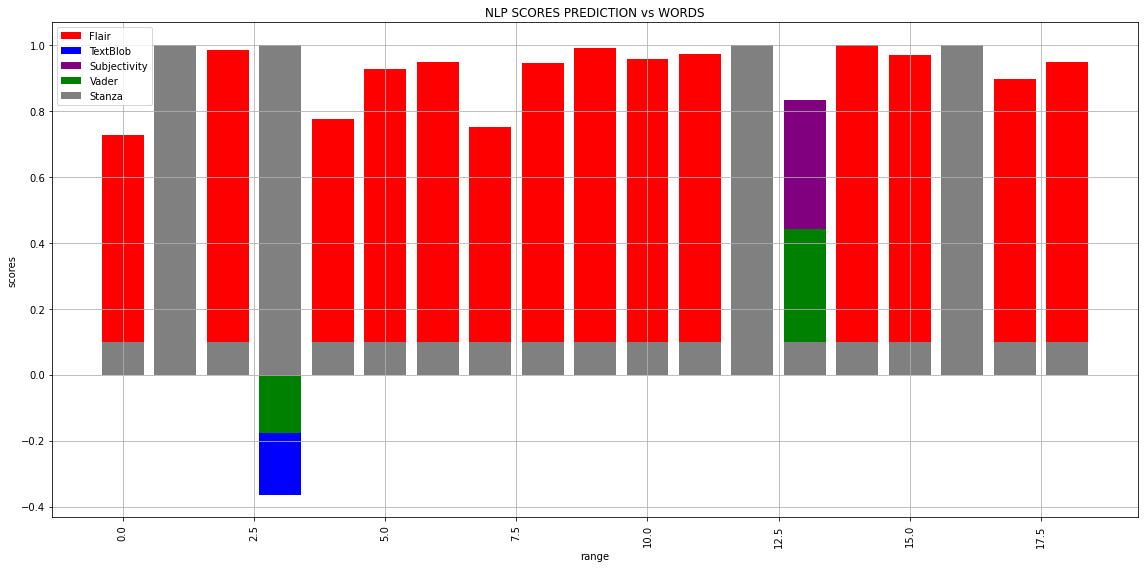

In [40]:
plot_bar(
    p1y=y_flair,
    p2y=y_textblob_sentiment,
    p3y=y_textblob_subjectivity,
    p4y=y_vader,
    p5y=y_stanza,
    x=x_flair,
    size=(16,  8)
)

## **Plotting lines**

In [37]:
def plot_lines(p1y, p2y, p3y, p4y, p5y, x, size):
    plt.figure(figsize=size)
    plt.plot(x, p1y, linestyle='solid', color='red', label='Flair')
    plt.plot(x, p2y, linestyle='solid', color='blue', label='TextBlob')
    plt.plot(x, p3y, linestyle='dashed', color='purple', label='Subjectivity')
    plt.plot(x, p4y, linestyle='solid', color='green', label='Vader')
    plt.plot(x, p5y, linestyle='solid', color='black', label='Stanza')
    plt.title('NLP SCORES PREDICTION vs WORDS')
    plt.xlabel('length')
    plt.ylabel('scores')
    plt.legend()
    plt.xticks(size=10, rotation='vertical')
    plt.yticks(size=10)
    plt.grid(True)
    
    plt.show()

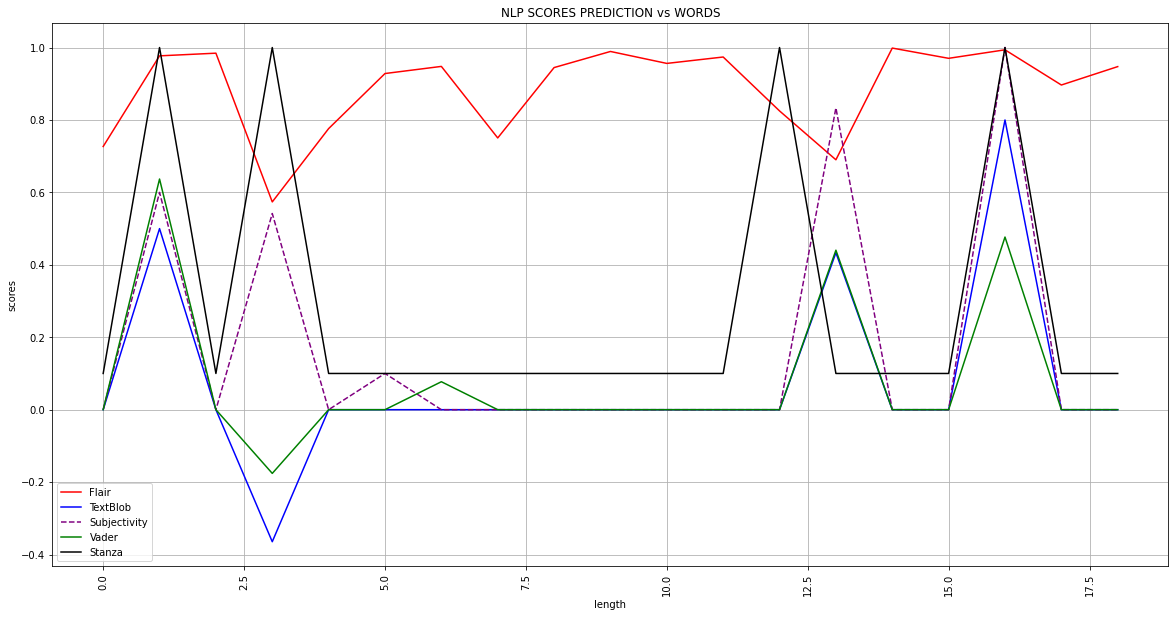

In [38]:
plot_lines(
    p1y=y_flair,
    p2y=y_textblob_sentiment,
    p3y=y_textblob_subjectivity,
    p4y=y_vader,
    p5y=y_stanza,
    x=x_flair,
    size=(20,  10)
)